In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
def eda_vehicle_dataset(dataset):
    print(f"Number of classes: {len(dataset.classes)}")
    print(f"Class names: {dataset.classes}")
    print(f"Number of images: {len(dataset)}")

In [3]:
class CustomVehicleDataset(ImageFolder):
    def __init__(self, root_dir, transform=None):
        super(CustomVehicleDataset, self).__init__(root=root_dir, transform=transform)

In [4]:
vehicle_dataset_path = r'E:\Tim\sem 6\DL lab\ex2\q3\data\train'

vehicle_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

In [10]:

#vehicle_dataset = CustomVehicleDataset(root_dir=vehicle_dataset_path, transform=vehicle_transform)
vehicle_dataset = ImageFolder(root=vehicle_dataset_path,transform=vehicle_transform)
eda_vehicle_dataset(vehicle_dataset)
vehicle_dataloader = DataLoader(vehicle_dataset, batch_size=32, shuffle=True)

Number of classes: 10
Class names: ['SUV', 'bus', 'family sedan', 'fire engine', 'heavy truck', 'jeep', 'minibus', 'racing car', 'taxi', 'truck']
Number of images: 1400


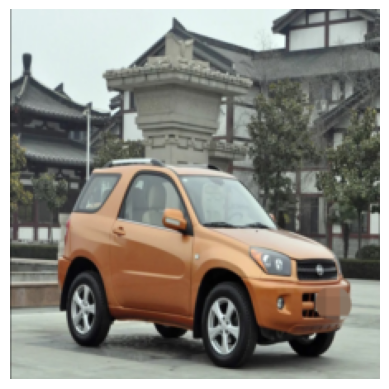

In [14]:
image,_ = vehicle_dataset[0]
image = image.permute(1,2,0).numpy()
plt.imshow(image)
plt.axis('off')
plt.show()

In [7]:
class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x


In [8]:
input_size = 224 * 224 * 3
hidden_size = 128
output_size = len(vehicle_dataset.classes)

vehicle_model = MLPClassifier(input_size, hidden_size, output_size)
criterion_vehicle = nn.CrossEntropyLoss()
optimizer_vehicle = optim.Adam(vehicle_model.parameters(), lr=0.001)
epochs_vehicle = 10


In [23]:
l=[]
for epoch in range(epochs_vehicle):
    for inputs, labels in vehicle_dataloader:
        inputs = inputs.view(inputs.size(0), -1)
        optimizer_vehicle.zero_grad()
        outputs = vehicle_model(inputs)
        loss = criterion_vehicle(outputs, labels)
        loss.backward()
        optimizer_vehicle.step()
    l.append(loss.item())
    print(f'Epoch {epoch + 1}/{epochs_vehicle}, Loss: {loss.item()}')

Epoch 1/10, Loss: 2.4611504077911377
Epoch 2/10, Loss: 2.4194839000701904
Epoch 3/10, Loss: 2.4194839000701904
Epoch 4/10, Loss: 2.3361504077911377
Epoch 5/10, Loss: 2.3361504077911377
Epoch 6/10, Loss: 2.3361504077911377
Epoch 7/10, Loss: 2.252817153930664
Epoch 8/10, Loss: 2.3361504077911377
Epoch 9/10, Loss: 2.2944839000701904
Epoch 10/10, Loss: 2.377817153930664


In [24]:
vehicle_model_path = 'vehicle_model.pth'
torch.save(vehicle_model.state_dict(), vehicle_model_path)
print(f"Model saved at {vehicle_model_path}.")

Model saved at vehicle_model.pth.


Text(0, 0.5, 'Training loss')

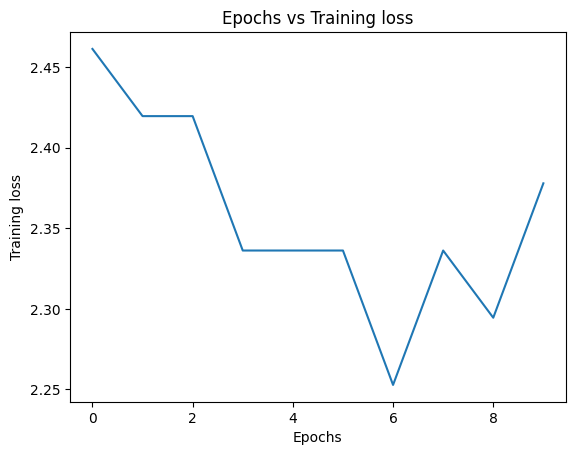

In [25]:
plt.plot([i for i in range(epochs_vehicle)],l)
plt.title("Epochs vs Training loss")
plt.xlabel("Epochs")
plt.ylabel("Training loss")